<a href="https://colab.research.google.com/github/abhinavanagarajan/oil-spill-detection-from-AIS/blob/main/oil_spill_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/abhinavanagarajan/election/main/oilspilldataset.csv')
df


,Course,Speed,Heading,RateofTurn,PositionAccuracy,SOG,Latitude,Longitude,COG,AISType,...,VesselNetTonnage,VesselDraft,VesselBeam,VesselLength,VesselHeight,VesselEnginePower,VesselFuelCapacity,VesselCargoCapacity,VesselCrewSize,SpillCond
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200.0,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100.0,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400.0,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000.0,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0


In [ ]:
y=df['SpillCond']
y

,SpillCond
0,1
1,0
2,1
3,1
4,0
...,...
932,0
933,0
934,0
935,0


In [ ]:
x=df.drop('SpillCond',axis=1)
x

,Course,Speed,Heading,RateofTurn,PositionAccuracy,SOG,Latitude,Longitude,COG,AISType,...,VesselGrossTonnage,VesselNetTonnage,VesselDraft,VesselBeam,VesselLength,VesselHeight,VesselEnginePower,VesselFuelCapacity,VesselCargoCapacity,VesselCrewSize
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,69,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,69,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,69,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,69,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,69,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200.0,59.42,10.34,884.0,0.17,...,50,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39
933,201,11,98.82,248.64,159,89100.0,59.64,10.18,831.0,0.17,...,50,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53
934,202,14,25.14,428.86,24,113400.0,60.14,17.94,847.0,0.30,...,50,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12
935,203,10,96.00,451.30,68,81000.0,59.90,15.01,831.0,0.25,...,50,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=155)

In [ ]:
x_train

,Course,Speed,Heading,RateofTurn,PositionAccuracy,SOG,Latitude,Longitude,COG,AISType,...,VesselGrossTonnage,VesselNetTonnage,VesselDraft,VesselBeam,VesselLength,VesselHeight,VesselEnginePower,VesselFuelCapacity,VesselCargoCapacity,VesselCrewSize
588,20,49,32.96,635.39,75,396900.0,50.29,10.25,3377.0,0.20,...,67,1484.32,284.60,169.85,80.55,8.74,1,4930.59,66.18,5.93
888,156,15,31.93,634.27,73,121500.0,57.73,16.55,1064.0,0.29,...,50,402.49,180.00,157.50,45.00,2.56,0,4192.09,66.18,5.92
305,11,132,956.77,1188.21,69,330000.0,38.79,6.87,3080.0,0.18,...,63,1012.42,447.21,272.82,126.56,3.71,0,4717.93,66.01,7.10
592,24,61,22.00,465.15,88,494100.0,48.10,13.42,3128.0,0.28,...,67,1080.00,630.00,375.00,187.35,2.88,0,5989.12,65.95,6.07
103,93,67,1582.84,1076.15,15,167500.0,33.97,6.94,2220.0,0.20,...,55,776.21,364.01,170.29,105.23,4.56,0,4731.78,66.08,7.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,59,400,1294.70,1256.43,66,1000000.0,39.10,6.95,8800.0,0.18,...,55,3178.05,492.44,259.19,111.11,12.26,1,6482.29,66.13,7.51
608,40,12,189.50,301.33,52,97200.0,47.25,12.14,831.0,0.26,...,67,254.56,127.28,63.64,90.00,4.00,0,14134.64,65.80,6.76
151,142,192,1663.45,1041.51,55,480000.0,37.33,8.63,4920.0,0.23,...,55,1400.89,403.11,283.17,77.08,4.95,0,4584.48,66.07,8.02
766,34,27,41.81,403.11,66,218700.0,54.89,10.70,1895.0,0.20,...,50,886.40,180.00,140.00,47.43,6.33,0,2367.42,65.88,6.19


In [ ]:
x_test

,Course,Speed,Heading,RateofTurn,PositionAccuracy,SOG,Latitude,Longitude,COG,AISType,...,VesselGrossTonnage,VesselNetTonnage,VesselDraft,VesselBeam,VesselLength,VesselHeight,VesselEnginePower,VesselFuelCapacity,VesselCargoCapacity,VesselCrewSize
692,45,11,133.91,644.55,109,89100.0,67.64,8.12,937.0,0.12,...,73,284.60,90.00,90.00,0.00,3.16,0,3322.09,66.24,6.24
395,128,51,971.06,1052.90,150,127500.0,39.82,7.84,1410.0,0.20,...,63,583.10,223.61,156.97,75.36,3.71,0,3232.84,65.95,7.17
544,50,344,561.97,1871.33,140,483750.0,27.82,7.70,5003.5,0.28,...,86,0.00,0.00,0.00,0.00,0.00,0,8948.39,36.42,14.79
929,197,10,26.00,123.20,64,81000.0,58.80,11.33,794.0,0.19,...,50,402.49,180.00,90.00,73.48,4.47,0,7162.29,65.50,6.43
861,129,13,30.08,219.54,74,105300.0,54.08,6.40,1027.0,0.12,...,50,484.66,180.00,108.00,40.25,4.49,0,3246.17,65.63,6.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,62,52,1608.88,1464.15,73,130000.0,31.54,5.25,2000.0,0.17,...,55,886.00,111.80,84.44,31.92,10.49,1,4044.22,66.27,7.81
479,47,140,1039.84,1246.79,9,196875.0,36.27,14.17,2582.0,0.39,...,85,795.50,339.58,185.04,99.46,4.30,0,8744.38,36.71,15.13
133,123,72,1606.14,1110.06,99,180000.0,36.50,6.89,1760.0,0.19,...,55,559.02,304.14,243.17,72.16,2.30,0,4456.55,66.10,7.93
694,47,13,118.31,460.62,159,105300.0,68.62,11.25,1027.0,0.16,...,73,484.66,201.25,94.25,71.39,5.14,0,7230.66,65.99,6.38


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#accuracy_score(y_test,y_pred)
model=RandomForestClassifier(n_estimators=175)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=175)

In [ ]:
y_lr_train_pred=model.predict(x_train)
y_lr_test_pred=model.predict(x_test)

In [ ]:
y_lr_train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_lr_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [724]:
from sklearn.metrics import mean_squared_error,r2_score

lr_train_mse=mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2=r2_score(y_train,y_lr_train_pred)

lr_test_mse=mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2=r2_score(y_test,y_lr_test_pred)

adj_lr_test_r2=1-(1-lr_test_r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print('RFC MSE (Train):',lr_train_mse)
print('RFC R2 (Train):',lr_train_r2)
print('RFC MSE (Test):',lr_test_mse)
print('RFC R2 (Test):',lr_test_r2)
#print('RFC Adjusted R2 (Test):',adj_lr_test_r2)

print('RFC Accuracy:',accuracy_score(y_test,y_lr_test_pred))

RFC MSE (Train): 0.0
RFC R2 (Train): 1.0
RFC MSE (Test): 0.010638297872340425
RFC R2 (Test): 0.7032359905288081
RFC Accuracy: 0.9893617021276596


In [ ]:
lr_results=pd.DataFrame(['Random Forest Classification',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns=['Method','Training MSE','Training R2','Test MSE','Test R2']

In [ ]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest Classification,0.0,1.0,0.010638,0.703236


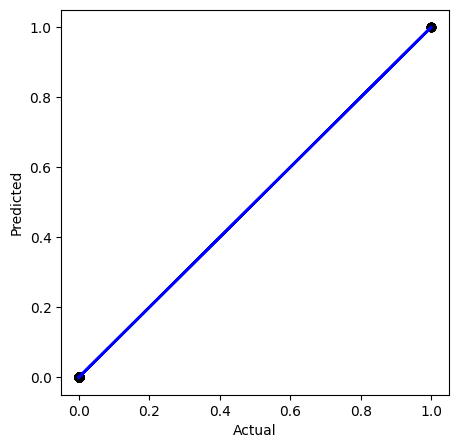

In [ ]:
import matplotlib.pyplot as plt
import numpy as mp

plt.figure(figsize=(5,5))
plt.scatter(y_train,y_lr_train_pred,c='black',alpha=0.3)
plt.plot(y_train,y_train,c='blue',linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
l=[2,22325,79.11,841.03,180,55812500,51.11,1.21,61900,0.02,901.7,0.02,0.03,0.11,0.01,0.11,6058.23,4061.15,2.3,0.02,0.02,87.65,0,0.58,132.78,-0.01,3.78,0.84,7.09,-2.21,0,0,0,0,704,40140,0,68.65,89,69,5750,11500,9593.48,1648.8,0.6,0,51572.04,65.73,6.26,0]
print(len(l))
import random
outp=[]
for ea in range(5):
    k=[]
    for i in range(len(l)-1):
        if (type(l[i]) == int):
            k.append(l[i]+random.randint(0,9))
        else:
            k.append(round(l[i]+random.random(),3))
    outp.append(k)
outp.append([4,1201,1562.53,295.65,66,3002500,42.4,7.97,18030,0.19,166.5,0.21,0.26,0.48,0.1,0.38,120.22,33.47,1.91,0.16,0.21,87.65,0,0.48,132.78,-0.01,3.78,0.84,6.78,-3.54,-0.33,2.2,0,2.2,183,10080,0,108.27,89,69,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07])

50


In [ ]:
input_data = pd.DataFrame(outp,columns=['Course', 'Speed', 'Heading', 'RateofTurn', 'PositionAccuracy', 'SOG', 'Latitude', 'Longitude', 'COG', 'AISType', 'NavigationalStatus', 'IMOMessage', 'Timestamp', 'Date', 'WeatherConditions', 'DistanceTraveled', 'TimeToDestination', 'DeviationfromCourse', 'VesselTrafficDensity', 'VesselCollisions', 'VesselEncounters', 'PortTraffic', 'VesselSpeedViolations', 'VesselTracking', 'VesselIdentification', 'VesselClassification', 'VesselBehaviorAnalysis', 'VesselSafety', 'VesselSecurity', 'VesselEfficiency', 'VesselEmissions', 'VesselFuelConsumption', 'VesselMaintenance', 'VesselInsurance', 'VesselFinancing', 'VesselValuation', 'VesselOwnership', 'VesselDisplacement', 'VesselDeadweight', 'VesselGrossTonnage', 'VesselNetTonnage', 'VesselDraft', 'VesselBeam', 'VesselLength', 'VesselHeight', 'VesselEnginePower', 'VesselFuelCapacity', 'VesselCargoCapacity', 'VesselCrewSize'])

predictions = model.predict(input_data)

# Print the prediction
print(predictions)

[0 0 0 0 0 1]
